# Name: Neelanjan Dutta

# Register number: 2448040

# Homework assignment

## Importing Libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as ClassicalPCA
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

## Small dataset:

In [2]:
X = np.array([
    [1.0, 1.0],
    [-1.0, -1.0]
])

## Amplitude auto encoding:

In [3]:
def amplitude_encode_vector(x):
    x=np.array(x,dtype=float)
    norm=np.linalg.norm(x)
    if norm==0:
        return np.array([1.0,0.0],dtype=complex)
    amp=Statevector((x/norm).astype(complex))
    return amp
statevecs=[amplitude_encode_vector(x) for x in X]
print("State Vectors:")
statevecs

State Vectors:


[Statevector([0.70710678+0.j, 0.70710678+0.j],
             dims=(2,)),
 Statevector([-0.70710678+0.j, -0.70710678+0.j],
             dims=(2,))]

## Building density matrix:

In [4]:
dim = statevecs[0].data.shape[0]
rho = np.zeros((dim,dim),dtype=complex)
for sv in statevecs:
    v=sv.data.reshape(-1,1)
    rho+=v@v.conj().T
rho= rho/len(statevecs)
print("Density matrix p:")
print(np.round(rho,4))

Density matrix p:
[[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]


## Eigen values and eigen vectors:

In [5]:
eigvals, eigvecs = np.linalg.eigh(rho) 
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx].real
eigvecs = eigvecs[:, idx].real
print("\nEigenvalues:", eigvals)
print("Top eigenvector (amplitude-encoding space):", eigvecs[:, 0])


Eigenvalues: [1. 0.]
Top eigenvector (amplitude-encoding space): [0.70710678 0.70710678]


## Comparison with classical PCA:

In [6]:
classical_pca = ClassicalPCA(n_components=1)
classical_pca.fit(X)
pc = classical_pca.components_[0]
var = classical_pca.explained_variance_[0]
print("\nClassical PCA principal component (sklearn):", pc)
print("Classical explained variance:", var)
sim_pc = eigvecs[:, 0]
# Normalize both
sim_pc_norm = sim_pc / np.linalg.norm(sim_pc)
pc_norm = pc / np.linalg.norm(pc)
# Compute absolute dot product as alignment measure:
alignment = abs(np.dot(sim_pc_norm, pc_norm))
print("\nAlignment (abs dot) between simulated QPCA top vector and classical PCA top vector:", alignment)


Classical PCA principal component (sklearn): [0.70710678 0.70710678]
Classical explained variance: 4.0

Alignment (abs dot) between simulated QPCA top vector and classical PCA top vector: 1.0


## Small quantum circuit:

In [7]:
sample = X[1]
amps = amplitude_encode_vector(sample)
qc = QuantumCircuit(1)
sv = Statevector(amps)
print("\nExample sample amplitudes (normalized):", np.round(amps, 4))
print("Corresponding statevector via Qiskit Statevector:", np.round(sv.data, 4))


Example sample amplitudes (normalized): [-0.7071+0.j -0.7071+0.j]
Corresponding statevector via Qiskit Statevector: [-0.7071+0.j -0.7071+0.j]


## Visualization:

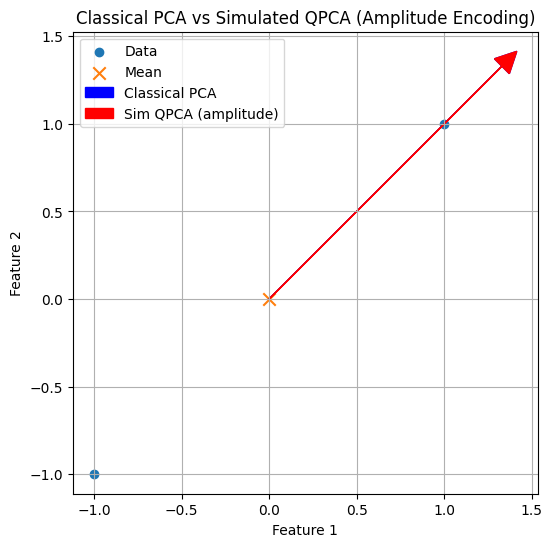

In [8]:
mean = np.mean(X, axis=0)
sim_dir = sim_pc_norm
class_dir = pc_norm

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], label='Data')
plt.scatter([mean[0]], [mean[1]], marker='x', s=80, label='Mean')

# Scale arrows so they’re visible
scale = 2.0

# Classical PCA direction (blue)
plt.arrow(mean[0], mean[1],
          scale * class_dir[0], scale * class_dir[1],
          head_width=0.12, head_length=0.12,
          color='b', label='Classical PCA', length_includes_head=True)

# Simulated QPCA direction (red)
plt.arrow(mean[0], mean[1],
          scale * sim_dir[0], scale * sim_dir[1],
          head_width=0.12, head_length=0.12,
          color='r', label='Sim QPCA (amplitude)', length_includes_head=True)

plt.legend()
plt.title("Classical PCA vs Simulated QPCA (Amplitude Encoding)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.axis('equal')
plt.show()

# Homework given:

## (a) Change the input to two or three different sets and check the output:

In [9]:
import numpy as np
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as ClassicalPCA

def amplitude_encode_vector(x):
    x = np.asarray(x, dtype=float)
    norm = np.linalg.norm(x)
    if norm == 0:
        return Statevector([1.0, 0.0])
    return Statevector((x / norm).astype(complex))

def qpca_from_dataset(X):
    statevecs = [amplitude_encode_vector(x) for x in X]
    dim = statevecs[0].data.shape[0]
    rho = np.zeros((dim, dim), dtype=complex)
    for sv in statevecs:
        v = sv.data.reshape(-1, 1)
        rho += v @ v.conj().T
    rho = rho / len(statevecs)
    eigvals, eigvecs = np.linalg.eigh(rho)
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx].real
    eigvecs = eigvecs[:, idx].real
    return eigvals, eigvecs

# Sample datasets
datasets = {
    "aligned_line": np.array([[1,1], [0.9,0.95], [1.1,1.05], [-1,-1]]),
    "cross":         np.array([[1,0], [-1,0], [0,1], [0,-1]]),
    "clustered":     np.array([[0.2,0.1], [0.25,0.05], [0.15,0.12], [0.18,0.08]])
}

for name, X in datasets.items():
    eigvals, eigvecs = qpca_from_dataset(X)
    classical = ClassicalPCA(n_components=1).fit(X)
    print(f"\n== Dataset: {name} ==")
    print("Eigenvalues (QPCA density):", np.round(eigvals, 4))
    print("Top eigenvector (QPCA):", np.round(eigvecs[:, 0], 4))
    print("Classical PCA comp:", np.round(classical.components_[0], 4))


== Dataset: aligned_line ==
Eigenvalues (QPCA density): [9.997e-01 3.000e-04]
Top eigenvector (QPCA): [0.7064 0.7078]
Classical PCA comp: [0.708  0.7062]

== Dataset: cross ==
Eigenvalues (QPCA density): [0.5 0.5]
Top eigenvector (QPCA): [0. 1.]
Classical PCA comp: [1. 0.]

== Dataset: clustered ==
Eigenvalues (QPCA density): [0.9718 0.0282]
Top eigenvector (QPCA): [-0.9053 -0.4247]
Classical PCA comp: [ 0.8261 -0.5636]


## (b) Check taking random output (random subsets / bootstrapped QPCA):

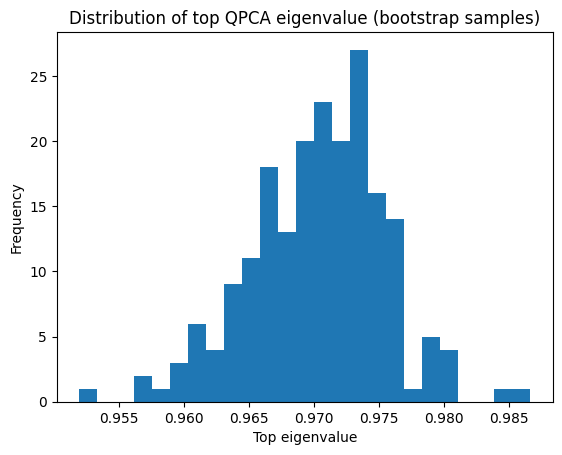

In [10]:
import numpy as np
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

def amplitude_encode_vector(x):
    x = np.asarray(x, dtype=float)
    norm = np.linalg.norm(x)
    if norm == 0:
        return Statevector([1.0, 0.0])
    return Statevector((x / norm).astype(complex))

def rho_from_samples(X):
    svs = [amplitude_encode_vector(x) for x in X]
    dim = svs[0].data.shape[0]
    rho = np.zeros((dim,dim), dtype=complex)
    for sv in svs:
        v = sv.data.reshape(-1,1)
        rho += v @ v.conj().T
    return rho / len(svs)

# Create base data
np.random.seed(42)
X_base = np.vstack([np.random.normal(loc=[2,2], scale=0.3, size=(50,2)),
                    np.random.normal(loc=[-1,-2], scale=0.2, size=(30,2))])

top_eigs = []
for _ in range(200):  # 200 random subsets
    idx = np.random.choice(len(X_base), size=40, replace=True)  # bootstrap sample
    rho = rho_from_samples(X_base[idx])
    eigvals, _ = np.linalg.eigh(rho)
    top_eigs.append(np.max(eigvals.real))

import matplotlib.pyplot as plt
plt.hist(top_eigs, bins=25)
plt.title("Distribution of top QPCA eigenvalue (bootstrap samples)")
plt.xlabel("Top eigenvalue")
plt.ylabel("Frequency")
plt.show()

## (c) Check the complete visualization (data, classical PC, QPCA directions, density matrix heatmap):

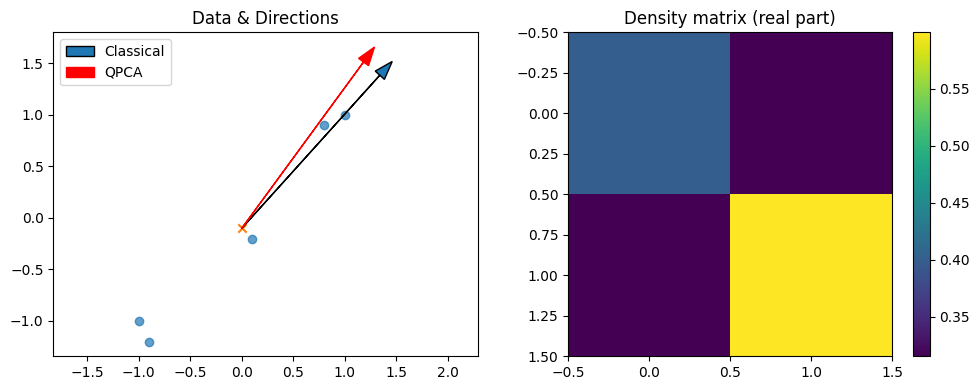

QPCA eigenvalues: [0.8307 0.1693]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector
from sklearn.decomposition import PCA as ClassicalPCA

def amplitude_encode_vector(x):
    x = np.asarray(x, dtype=float)
    norm = np.linalg.norm(x)
    if norm == 0:
        return Statevector([1.0, 0.0])
    return Statevector((x / norm).astype(complex))

def qpca_and_plot(X):
    # Classical PCA
    classical = ClassicalPCA(n_components=1).fit(X)
    pc = classical.components_[0]
    # QPCA rho
    svs = [amplitude_encode_vector(x) for x in X]
    dim = svs[0].data.shape[0]
    rho = sum((sv.data.reshape(-1,1) @ sv.data.reshape(1,-1).conj()) for sv in svs) / len(svs)
    eigvals, eigvecs = np.linalg.eigh(rho)
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx].real
    eigvecs = eigvecs[:, idx].real
    sim_dir = eigvecs[:, 0]
    # plotting
    mean = X.mean(axis=0)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.scatter(X[:,0], X[:,1], alpha=0.7)
    plt.scatter([mean[0]],[mean[1]], marker='x')
    scale = 2.0
    plt.arrow(mean[0], mean[1], scale*pc[0], scale*pc[1], head_width=0.12, label='Classical')
    plt.arrow(mean[0], mean[1], scale*sim_dir[0], scale*sim_dir[1], head_width=0.12, color='r', label='QPCA')
    plt.legend(); plt.title("Data & Directions"); plt.axis('equal')
    # density matrix heatmap
    plt.subplot(1,2,2)
    plt.imshow(np.round(rho.real, 4), interpolation='nearest')
    plt.colorbar(); plt.title("Density matrix (real part)")
    plt.tight_layout(); plt.show()
    print("QPCA eigenvalues:", np.round(eigvals,4))

# test data
X = np.array([[1.0,1.0], [-1.0,-1.0], [0.8,0.9], [-0.9,-1.2], [0.1,-0.2]])
qpca_and_plot(X)

## (d) Try another encoding scheme (angle encoding / basis encoding):

In [12]:
import numpy as np
from qiskit.quantum_info import Statevector
from math import pi
import matplotlib.pyplot as plt

# 2-qubit example for basis encoding (maps 2-d vector to computational basis amplitudes)
def basis_encode_vector(x):
    # Simple mapping: normalize and place components into basis amplitudes
    x = np.asarray(x, dtype=float)
    norm = np.linalg.norm(x)
    if norm == 0:
        amps = np.zeros(2, dtype=complex); amps[0] = 1.0; return Statevector(amps)
    # For 2-d features, represent as 2-amplitude state (same as amplitude encoding)
    return Statevector((x / norm).astype(complex))

# Angle encoding: convert features to rotation angles and build state by Rx rotations on single qubit
def angle_encode_vector(x):
    # map each feature to an angle; for 2 features, combine into one qubit rotation sequence
    x = np.asarray(x, dtype=float)
    # Simple map: theta = normalized_feature * pi
    norm = np.linalg.norm(x)
    if norm == 0:
        return Statevector([1.0, 0.0])
    thetas = (x / (np.max(np.abs(x)) + 1e-9)) * pi  # scale to [-pi,pi]
    # start from |0>, apply Rx(theta1) then Rz(theta2) equivalently set statevector manually
    # For simplicity, construct single qubit state: cos(theta/2)|0> + sin(theta/2)|1>
    theta = thetas.sum()  # combine features into one rotation parameter (simple)
    return Statevector([np.cos(theta/2), np.sin(theta/2)])

def rho_from_states(statevecs):
    dim = statevecs[0].data.shape[0]
    rho = np.zeros((dim,dim), dtype=complex)
    for sv in statevecs:
        v = sv.data.reshape(-1,1)
        rho += v @ v.conj().T
    return rho / len(statevecs)

# sample data
X = np.array([[1,2], [0.9,1.8], [-1,-2], [0.5,-0.4]])
for enc_name, encoder in [("amplitude", basis_encode_vector), ("angle", angle_encode_vector)]:
    states = [encoder(x) for x in X]
    rho = rho_from_states(states)
    eigvals, eigvecs = np.linalg.eigh(rho)
    print(f"\nEncoding: {enc_name}")
    print("Eigenvalues:", np.round(np.sort(eigvals)[::-1].real,4))


Encoding: amplitude
Eigenvalues: [0.766 0.234]

Encoding: angle
Eigenvalues: [0.6135 0.3865]


## (e) Try the rho (density matrix) calculation logic differently:

In [13]:
import numpy as np
from qiskit.quantum_info import Statevector

def amplitude_encode_vector(x):
    x = np.asarray(x, dtype=float)
    norm = np.linalg.norm(x)
    if norm == 0:
        return Statevector([1.0, 0.0])
    return Statevector((x / norm).astype(complex))

def rho_by_pure_average(X):
    svs = [amplitude_encode_vector(x) for x in X]
    dim = svs[0].data.shape[0]
    rho = np.zeros((dim,dim), dtype=complex)
    for sv in svs:
        v = sv.data.reshape(-1,1)
        rho += v @ v.conj().T
    return rho / len(svs)

def rho_from_covariance(X):
    # classical covariance -> normalize to create valid density matrix
    cov = np.cov(X.T)
    # embed 2x2 covariance into 2x2 density if dims match; map to positive semidef by adding small identity
    cov = cov + 1e-6 * np.eye(cov.shape[0])
    # make PSD and trace-1
    eig, vec = np.linalg.eigh(cov)
    eig[eig < 0] = 0
    cov_psd = (vec @ np.diag(eig) @ vec.T)
    rho = cov_psd / np.trace(cov_psd)
    return rho

# test
X = np.array([[1.0,1.0], [-1.0,-1.0], [0.5,0.6]])
rho_avg = rho_by_pure_average(X)
rho_cov = rho_from_covariance(X)

print("rho (pure average):\n", np.round(rho_avg.real,4))
print("rho (from covariance):\n", np.round(rho_cov.real,4))

rho (pure average):
 [[0.4699 0.4973]
 [0.4973 0.5301]]
rho (from covariance):
 [[0.4917 0.4992]
 [0.4992 0.5083]]


## (f) Sorting of eigenvectors in a different logic:

In [14]:
import numpy as np
from qiskit.quantum_info import Statevector

def amplitude_encode_vector(x):
    x = np.asarray(x, dtype=float)
    norm = np.linalg.norm(x)
    if norm == 0:
        return Statevector([1.0,0.0])
    return Statevector((x / norm).astype(complex))

def compute_eig_and_sort_options(X):
    # build rho
    svs = [amplitude_encode_vector(x) for x in X]
    rho = sum((sv.data.reshape(-1,1) @ sv.data.reshape(1,-1).conj()) for sv in svs) / len(svs)
    eigvals, eigvecs = np.linalg.eigh(rho)
    # 1) standard sort by eigenvalue descending
    idx_val = np.argsort(eigvals)[::-1]
    eigvals_byval = eigvals[idx_val].real
    eigvecs_byval = eigvecs[:, idx_val].real
    # 2) sort by absolute projection onto mean-encoded state
    mean_vec = X.mean(axis=0)
    mean_sv = amplitude_encode_vector(mean_vec).data.real
    projs = np.abs((eigvecs.conj().T @ mean_sv))
    idx_proj = np.argsort(projs)[::-1]
    eigvals_byproj = eigvals[idx_proj].real
    eigvecs_byproj = eigvecs[:, idx_proj].real
    return (eigvals_byval, eigvecs_byval), (eigvals_byproj, eigvecs_byproj)

# sample
X = np.array([[1,1], [0.9,0.85], [-1,-1]])
a,b = compute_eig_and_sort_options(X)
print("By eigenvalue top eigenvector:", a[1][:,0])
print("By projection onto mean top eigenvector:", b[1][:,0])

By eigenvalue top eigenvector: [-0.71380634 -0.70034314]
By projection onto mean top eigenvector: [-0.71380634 -0.70034314]


## (g) Try the whole implementation using PennyLane (simple circuit):

In [15]:
!pip install pennylane pennylane-qiskit

   ---------------------------------------- 0.0/5.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/5.3 MB ? eta -:--:--
   ----- ---------------------------------- 0.8/5.3 MB 2.4 MB/s eta 0:00:02
   ----- ---------------------------------- 0.8/5.3 MB 2.4 MB/s eta 0:00:02
   ------- -------------------------------- 1.0/5.3 MB 1.6 MB/s eta 0:00:03
   --------- ------------------------------ 1.3/5.3 MB 1.4 MB/s eta 0:00:03
   ------------- -------------------------- 1.8/5.3 MB 1.5 MB/s eta 0:00:03
   --------------- ------------------------ 2.1/5.3 MB 1.4 MB/s eta 0:00:03
   ----------------- ---------------------- 2.4/5.3 MB 1.5 MB/s eta 0:00:03
   --------------------- ------------------ 2.9/5.3 MB 1.6 MB/s eta 0:00:02
   ----------------------- ---------------- 3.1/5.3 MB 1.5 MB/s eta 0:00:02
   ----------------------- ---------------- 3.1/5.3 MB 1.5 MB/s eta 0:00:02
   --------------------------- ------------ 3.7/5.3 MB 1.5 MB/s eta 0:00:02
   -----------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


PennyLane rho eigenvalues: [1. 0.]


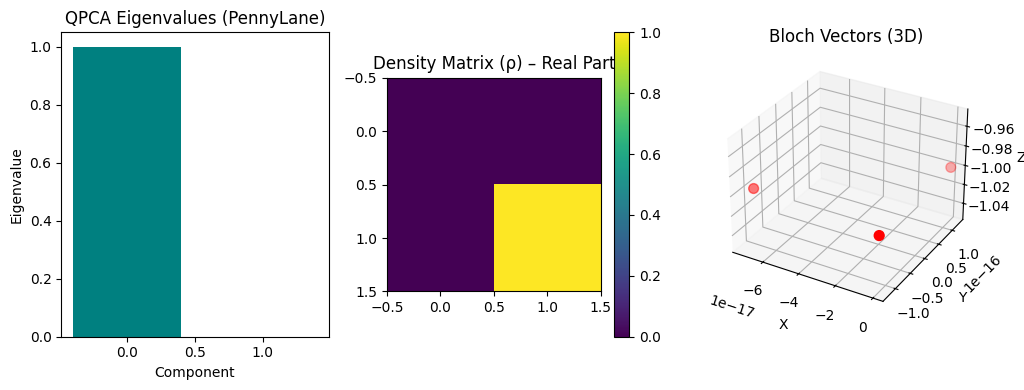

In [18]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

def angle_state(feature):
    # Convert a 2-d feature to single-qubit angles (theta, phi)
    scale = np.pi / (np.max(np.abs(feature)) + 1e-9)
    theta = feature[0] * (np.pi/np.max(np.abs(feature)))
    phi = feature[1] * (np.pi/np.max(np.abs(feature)))
    return theta, phi

# Use statevector simulator device
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def circuit_state(theta, phi):
    qml.RY(theta, wires=0)
    qml.RZ(phi, wires=0)
    return qml.state()

def build_rho_with_pennylane(X):
    states = []
    for x in X:
        theta, phi = angle_state(x)
        sv = circuit_state(theta, phi)
        states.append(sv.reshape(-1,1))
    rho = sum(s @ s.conj().T for s in states) / len(states)
    return rho, states

# Sample data
X = np.array([[1.0, 0.5], [-1.0, -0.3], [0.2, -0.1]])
rho, states = build_rho_with_pennylane(X)
eigvals, eigvecs = np.linalg.eigh(rho)
eigvals = np.sort(eigvals)[::-1].real

print("PennyLane rho eigenvalues:", np.round(eigvals, 4))

# Bar chart of eigenvalues
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.bar(range(len(eigvals)), eigvals, color='teal')
plt.title("QPCA Eigenvalues (PennyLane)")
plt.xlabel("Component")
plt.ylabel("Eigenvalue")

# Heatmap of the density matrix
plt.subplot(1,3,2)
plt.imshow(np.round(rho.real, 4), cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title("Density Matrix (ρ) – Real Part")

# Using Qiskit visualization
bloch_coords = np.array([state_to_bloch_coords(s) for s in states])
ax = plt.subplot(1,3,3, projection='3d')
ax.scatter(bloch_coords[:,0], bloch_coords[:,1], bloch_coords[:,2], color='r', s=50)
ax.set_title("Bloch Vectors (3D)")
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')

plt.tight_layout()
plt.show()